In [26]:
%matplotlib inline
from collections import defaultdict
import json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10,6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [27]:
states_abbrev = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [28]:
state2poly = defaultdict(list)
data  =  json.load(file("us-states.json"))
for f in data['features']:
    state = states_abbrev[f['id']]
    geo = f['geometry']
    if geo['type'] == 'Polygon':
        for coords in geo['coordinates']:
            state2poly[state].append(coords)
    elif geo['type'] == 'MultiPolygon':
        for polygon in geo['coordinates']:
            state2poly[state].extend(polygon)


In [29]:
state2poly['Alaska']

[[[-131.602021, 55.117982],
  [-131.569159, 55.28229],
  [-131.355558, 55.183705],
  [-131.38842, 55.01392],
  [-131.645836, 55.035827],
  [-131.602021, 55.117982]],
 [[-131.832052, 55.42469],
  [-131.645836, 55.304197],
  [-131.749898, 55.128935],
  [-131.832052, 55.189182],
  [-131.832052, 55.42469]],
 [[-132.976733, 56.437924],
  [-132.735747, 56.459832],
  [-132.631685, 56.421493],
  [-132.664547, 56.273616],
  [-132.878148, 56.240754],
  [-133.069841, 56.333862],
  [-132.976733, 56.437924]],
 [[-133.595627, 56.350293],
  [-133.162949, 56.317431],
  [-133.05341, 56.125739],
  [-132.620732, 55.912138],
  [-132.472854, 55.780691],
  [-132.4619, 55.671152],
  [-132.357838, 55.649245],
  [-132.341408, 55.506844],
  [-132.166146, 55.364444],
  [-132.144238, 55.238474],
  [-132.029222, 55.276813],
  [-131.97993, 55.178228],
  [-131.958022, 54.789365],
  [-132.029222, 54.701734],
  [-132.308546, 54.718165],
  [-132.385223, 54.915335],
  [-132.483808, 54.898904],
  [-132.686455, 55.046781]

In [30]:
def draw_state(plot,stateid,**kwargs):
    for polygon in state2poly[stateid]:
        xs,ys = zip(*polygon)
        plot.fill(xs,ys,**kwargs)
        
def make_map(states,label):
    print states.head()
    fig =  plt.figure(figsize=(12,9))
    ax = plt.gca()
    
    if states.max() < 2:
        cmap = cm.RdBu
        vmin,vmax = 0,1
    else:
        cmap = cm.binary
        vmin,vmax = 0, states.max()
    norm = mpl.colors.Normalize(vmin=vmin,vmax =vmax)
    print norm
    
    skip = set(['National', 'District of Columbia', 'Guam', 'Puerto Rico',
                'Virgin Islands', 'American Samoa', 'Northern Mariana Islands'])
    for state in states_abbrev.values():
        if state not in states.index:
            color = cmap(norm(0))
        else:
            color  = cmap(norm(states.ix[state]))
        draw_state(ax,state,color = color,ec = 'k')
    
    ax1 = fig.add_axes([0.45, 0.70, 0.4, 0.02])
    cb1=mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                  norm=norm,
                                  orientation='horizontal')
    
    ax1.set_title(label)
    remove_border(ax,left = False, bottom=False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-180, -60)
    ax.set_ylim(15, 75)
    return ax

In [31]:
electoral_votes = pd.read_csv("electoral_votes.csv").set_index('State')

In [32]:
electoral_votes.Votes

State
California              55
Texas                   38
New York                29
Florida                 29
Illinois                20
Pennsylvania            20
Ohio                    18
Michigan                16
Georgia                 16
North Carolina          15
New Jersey              14
Virginia                13
Washington              12
Massachusetts           11
Indiana                 11
Tennessee               11
Arizona                 11
Missouri                10
Maryland                10
Minnesota               10
Wisconsin               10
Alabama                  9
Colorado                 9
South Carolina           9
Louisiana                8
Kentucky                 8
Connecticut              7
Oklahoma                 7
Oregon                   7
Iowa                     6
Arkansas                 6
Kansas                   6
Mississippi              6
Nevada                   6
Utah                     6
Nebraska                 5
New Mexico            

State
California    55
Texas         38
New York      29
Florida       29
Illinois      20
Name: Votes, dtype: int64


/home/ais/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


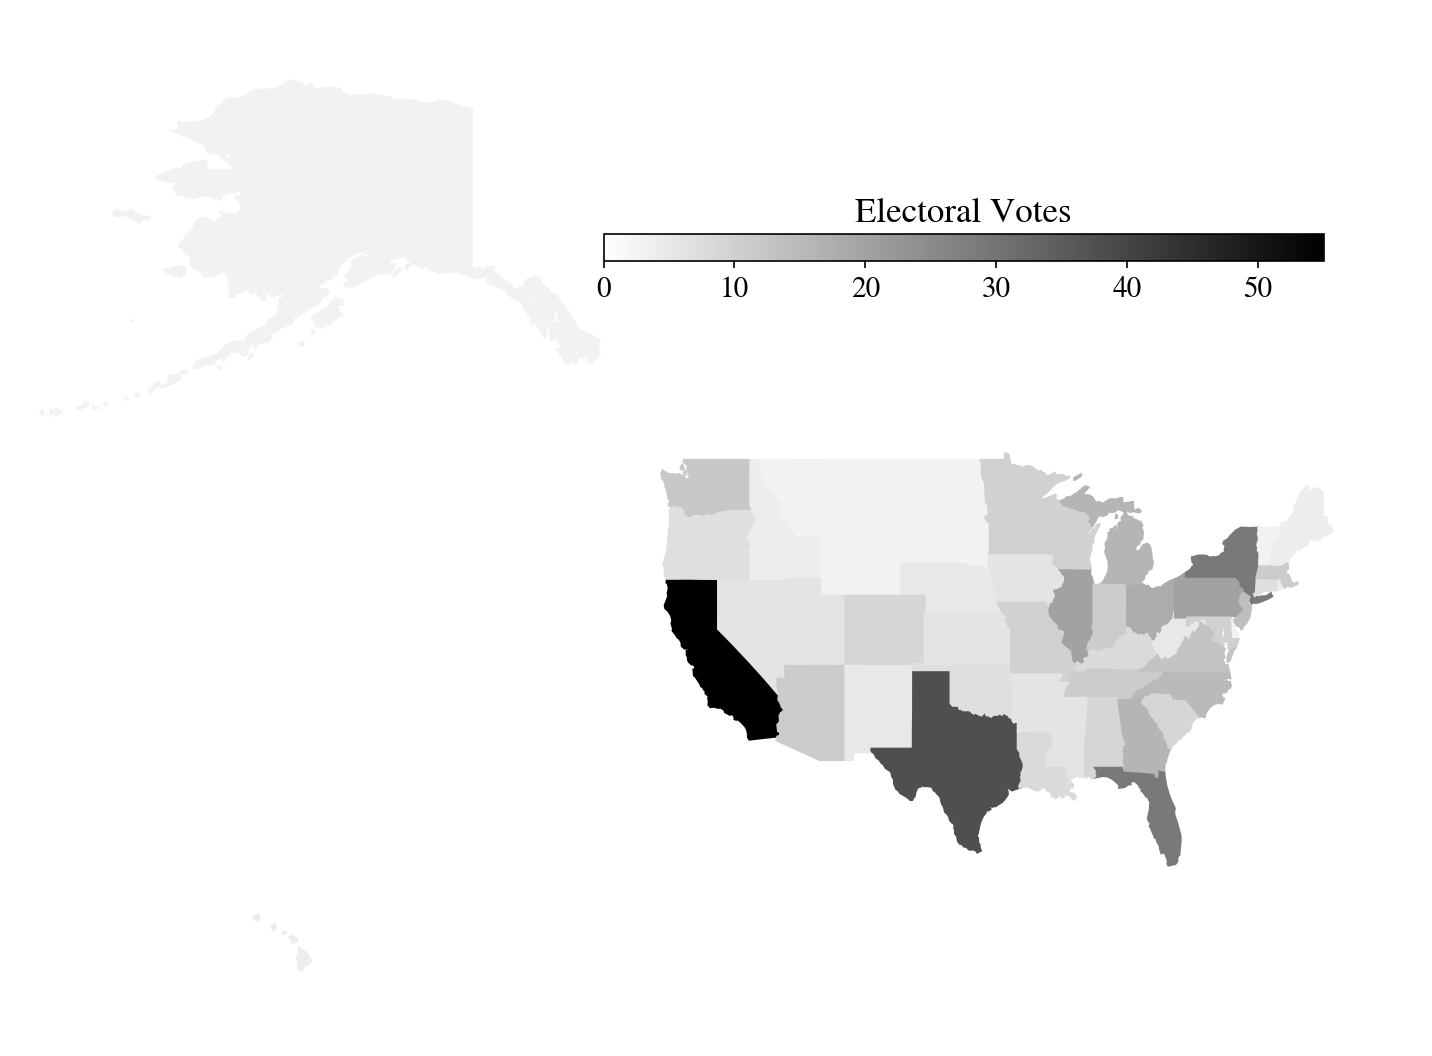

In [33]:
make_map(electoral_votes.Votes,"Electoral Votes")

In [34]:
predictwise =  pd.read_csv("predictwise.csv")

In [35]:
predictwise.Votes.sum()

538L

In [36]:
new_df = predictwise[predictwise['Obama']>predictwise['Romney']]
new_df = new_df[['Votes','States']] 
new_df.head()

,Votes,States
4,55,California
5,9,Colorado
6,7,Connecticut
7,3,Delaware
8,3,District of Columbia


In [37]:
df_n = new_df.set_index('States')

In [38]:
'Virgini' in df_n.index

False

States
California              55
Colorado                 9
Connecticut              7
Delaware                 3
District of Columbia     3
Name: Votes, dtype: int64


/home/ais/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


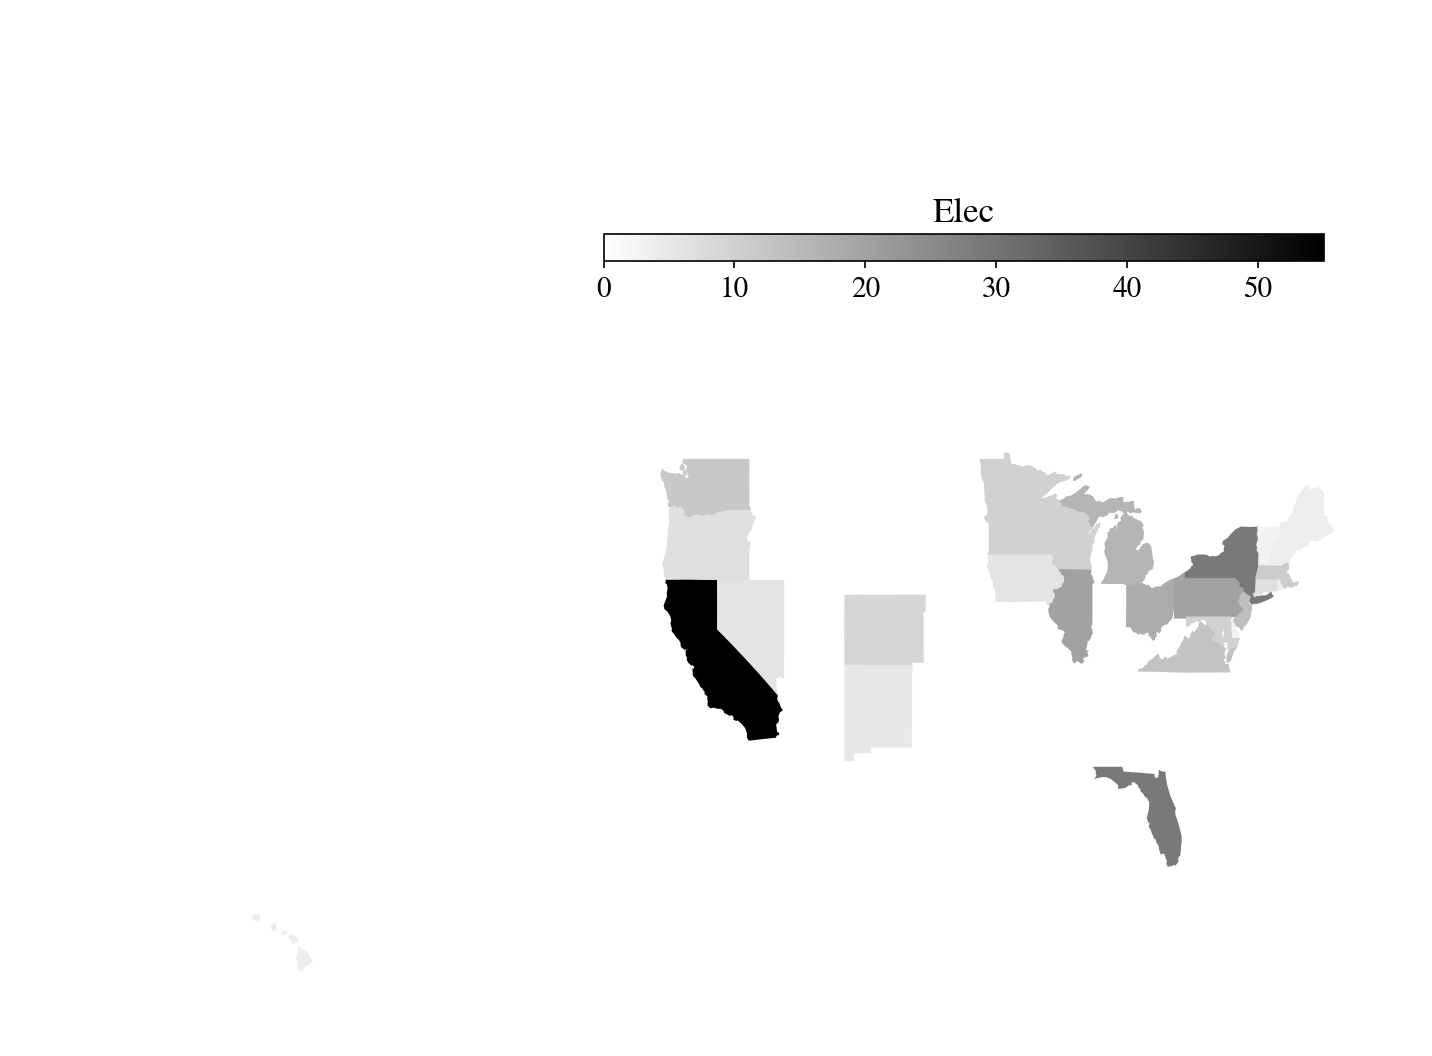

In [39]:
make_map(df_n['Votes'],"Elec")

In [40]:
def simulate_election(data_received,nsim):
    result = []
    for i in range(nsim):
        sum = 0
        for index,row in data_received.iterrows():
            prob = np.random.uniform()
            if prob<row['Obama']:
                sum = sum + row['Votes']
        
        result.append(sum)
    return result
                
                

In [41]:
result = simulate_election(predictwise[['Obama','Votes']],10000)

In [42]:
result

[291.0,
 321.0,
 321.0,
 303.0,
 347.0,
 320.0,
 314.0,
 350.0,
 341.0,
 319.0,
 332.0,
 328.0,
 312.0,
 332.0,
 332.0,
 357.0,
 297.0,
 337.0,
 314.0,
 332.0,
 312.0,
 302.0,
 338.0,
 307.0,
 306.0,
 338.0,
 318.0,
 308.0,
 362.0,
 326.0,
 341.0,
 345.0,
 328.0,
 303.0,
 294.0,
 343.0,
 314.0,
 319.0,
 307.0,
 309.0,
 290.0,
 337.0,
 312.0,
 332.0,
 347.0,
 290.0,
 323.0,
 311.0,
 328.0,
 351.0,
 338.0,
 310.0,
 338.0,
 299.0,
 303.0,
 303.0,
 343.0,
 330.0,
 287.0,
 358.0,
 332.0,
 332.0,
 311.0,
 303.0,
 330.0,
 326.0,
 299.0,
 299.0,
 335.0,
 313.0,
 323.0,
 293.0,
 293.0,
 327.0,
 330.0,
 334.0,
 298.0,
 341.0,
 313.0,
 332.0,
 326.0,
 332.0,
 335.0,
 309.0,
 349.0,
 329.0,
 313.0,
 343.0,
 287.0,
 328.0,
 347.0,
 297.0,
 334.0,
 330.0,
 339.0,
 338.0,
 297.0,
 303.0,
 314.0,
 309.0,
 347.0,
 342.0,
 328.0,
 335.0,
 300.0,
 332.0,
 307.0,
 349.0,
 317.0,
 294.0,
 316.0,
 317.0,
 319.0,
 332.0,
 333.0,
 303.0,
 332.0,
 305.0,
 347.0,
 279.0,
 341.0,
 335.0,
 303.0,
 341.0,
 331.0,


In [43]:
def plot_simulation(result):
    plt.hist(result,bins=np.arange(200,538,1),normed=True)

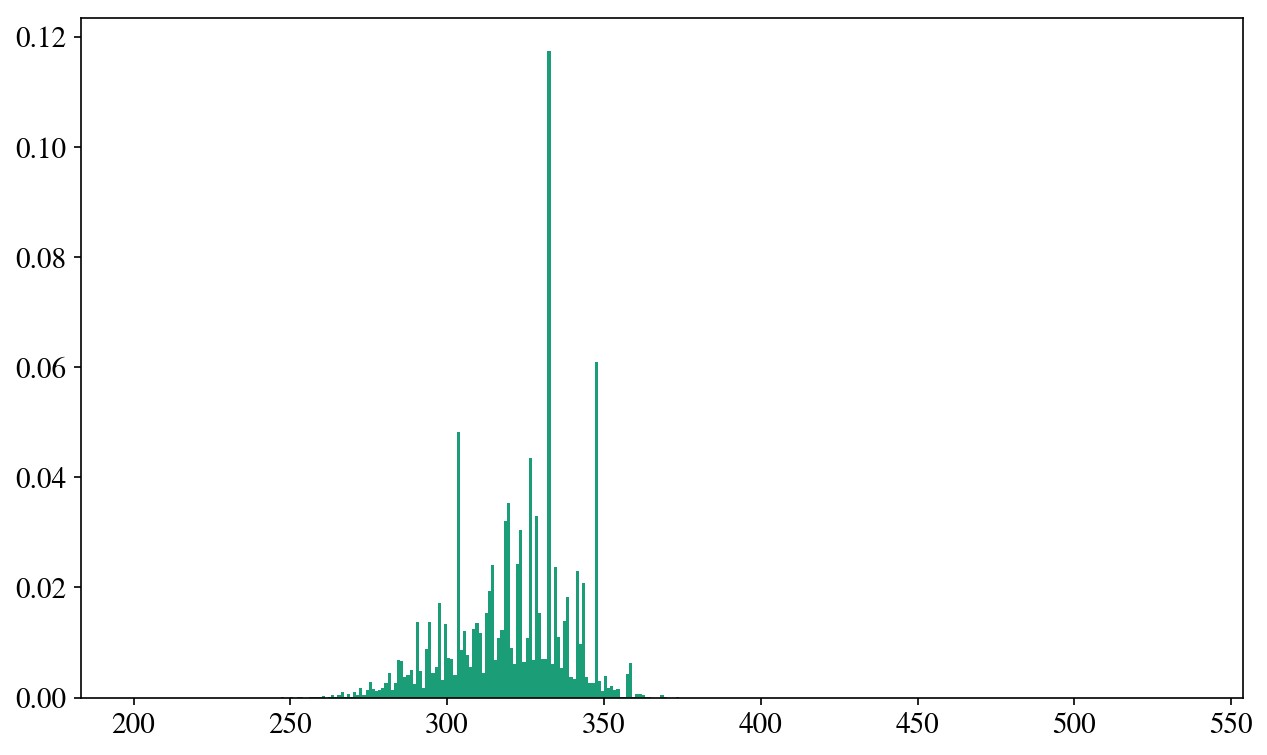

AttributeError: 'list' object has no attribute 'Obama'

In [44]:
plot_simulation(result)
plt.show()
make_map(result.Obama, "P(Obama): Simple Model")

In [ ]:
gallup  =  pd.read_csv("g12.csv")

In [ ]:
gallup.head()

In [ ]:
gallup['Unknown'] = 100-gallup['Democrat']- gallup['Republican']

In [ ]:
gallup.head()

In [ ]:
def simple_gallup_model(data):
    result = pd.DataFrame()
    result['State'] = data['State']
    result['Obama'] = (data['Dem_Adv']>0.0)*1
    result = result.set_index('State')
    return result


In [ ]:
result_df = simple_gallup_model(gallup)

In [ ]:
result_df.head()

In [ ]:
model = simple_gallup_model(gallup)
model = model.join(df_n)


In [ ]:
model.head()

In [ ]:
prediction = simulate_election(model, 10000)



In [ ]:

plt.show()
make_map(model.Obama, "P(Obama): Simple Model")

In [ ]:
gallup_data =  pd.read_csv("g12.csv")

In [ ]:
gallup_data.head()

In [ ]:
mu,sigma = 0.0,(3.0/100*13.6)

In [ ]:
sigma

In [ ]:
np.random.normal(mu,sigma,100)

In [ ]:
dem_adv =  gallup_data['Dem_Adv']
dem_adv =  np.n

In [ ]:
plt.hist(dem_adv,bins=100,normed='true')

In [ ]:
import scipy.stats

In [ ]:
def uncertain_gallup_model(gallup):
    normal_distribution = scipy.stats.norm(gallup.Dem_Adv,3)
    probality_greater_than_zero = 1 - normal_distribution.cdf(0)
    return pd.DataFrame(probality_greater_than_zero,index= gallup.index,columns=['Obama'],dtype = float)

In [ ]:
gallup_data = gallup_data.set_index('State')

In [ ]:
model =  uncertain_gallup_model(gallup_data)

In [ ]:
model.head()

In [ ]:
model = model.join(electoral_votes)

In [ ]:
make_map(model.Obama,"P(Obama+Uncertainity")

In [ ]:
model

In [ ]:
result =  simulate_election(model[['Obama','Votes']],10000)

In [ ]:
plot_simulation(result)

In [ ]:
def biased_simulation(model,bias):
    model['Dem_Adv']-=bias
    return model
    

In [ ]:
print gallup_data.ix['Florida']
gallup_data_biased = biased_simulation(gallup_data,1.0)
gallup_data_biased.ix['Florida']

In [ ]:
gallup_data

In [ ]:
electoral_votes

In [ ]:
# estimating bias from 08 elections
gallup_08_data = pd.read_csv("g08.csv").set_index('State')

In [ ]:
gallup_08_results =  pd.read_csv("2008results.csv").set_index('State')

In [ ]:
gallup_08_data.head()


In [ ]:
gallup_08_results.head()

In [ ]:
prediction_08 =  gallup_08_data[['Dem_Adv']]

In [ ]:
prediction_08['Dem_Win'] = gallup_08_results["Obama Pct"] -  gallup_08_results["McCain Pct"]

In [ ]:
prediction_08

In [ ]:
from sklearn import *

In [ ]:
plt.scatter(prediction_08['Dem_Adv'],prediction_08['Dem_Win'])

In [ ]:
fit = np.polyfit(prediction_08['Dem_Adv'],prediction_08['Dem_Win'],2)

In [ ]:
x =  np.linspace(-30,80,10)
y =  np.polyval(fit,x)
plt.plot(x,y)
plt.xlabel("Demographic Advantage")
plt.ylabel("Demgraphic Win")
plt.scatter(prediction_08['Dem_Adv'],prediction_08['Dem_Win'])

In [ ]:
 for index,row in prediction_08.iterrows():
        if (row['Dem_Adv']>0 and row['Dem_Win']<0):
            print index
            

In [ ]:
print (prediction_08['Dem_Adv']- prediction_08['Dem_Win']).mean()

In [ ]:
gallup_data_biased =  biased_simulation(gallup_data,8.06)

In [ ]:
gallup_data_biased

In [ ]:
national_results =  pd.read_csv("nat.csv")

In [ ]:
national_results.head()

In [ ]:
national_results.set_index("Year",inplace=True)

In [ ]:
national_results.head()

In [ ]:
polls04 = pd.read_csv("p04.csv")
polls04.set_index("State",inplace=True)

In [ ]:
polls04.head()

In [ ]:
pvi08 =  (polls04.Dem - polls04.Rep) - (national_results.xs(2004)['Dem'] - national_results.xs(2004)['Rep'])
pvi08.head()

In [ ]:
e2008 = pd.DataFrame(dict(pvi = pvi08,Dem_Win =  prediction_08.Dem_Win,Dem_Adv =  prediction_08.Dem_Adv- prediction_08.Dem_Adv.mean()))
e2008['obama_win'] =  1 * (prediction_08.Dem_Win > 0)
e2008 = e2008.sort_index()


In [ ]:
e2008.head()

In [ ]:
pvi12 = e2008.Dem_Win - (national_results.xs(2008)['Dem'] - national_results.xs(2008)['Rep'])
e2012 = pd.DataFrame(dict(pvi=pvi12, Dem_Adv=gallup_data.Dem_Adv - gallup_data.Dem_Adv.mean()))
e2012 = e2012.sort_index()
e2012.head()

In [ ]:
results2012 = pd.read_csv("2012results.csv")
results2012.set_index("State", inplace=True)
results2012 = results2012.sort_index()
results2012.head()

In [ ]:
plt.plot(e2008.pvi,e2012.pvi,'o',label = "Data")
fit =  np.polyfit(e2008.pvi,e2012.pvi,1)
x =  np.linspace(-50,80,10)
y =  np.polyval(fit,x)
plt.plot(x,x,'--k',label = "x = x")
plt.plot(x,y,label = "Linear Fit")
plt.xlabel("2008 data")
plt.ylabel("2012 data")

In [ ]:
plt.scatter(e2008[e2008.obama_win == 1].Dem_Adv,e2008[e2008.obama_win == 1].pvi,c = "blue")
plt.scatter(e2008[e2008.obama_win == 0].Dem_Adv,e2008[e2008.obama_win == 0].pvi,c = "red")
plt.scatter(e2012.Dem_Adv,e2012.pvi,c = "gray")

In [ ]:
from sklearn.linear_model import LogisticRegression

def prepare_features(frame2008,featuresList):
    y = frame2008.obama_win.values
    x = frame2008[featuresList].values
    if len(x.shape) == 1:
        x =  x.reshape(-1,1)
    return y,x


In [ ]:
def fit_logistic(frame2008,frame2012,featureList,reg= 0.0001):
    y,x = prepare_features(frame2008,featureList)
    clf2 = LogisticRegression(C=reg)
    clf2.fit(x,y)
    x_new = frame2012[featureList]
    obama_probs = clf2.predict_proba(x_new)[:,1]
    
    df = pd.DataFrame(index= frame2012.index)
    df['Obama'] = obama_probs
    return df,clf2


In [ ]:
from sklearn.grid_search import GridSearchCV

def cv_optimize(frame2008,featureList,n_folds = 10,num_p =100):
    y,x = prepare_features(frame2008,featureList)
    clf = LogisticRegression()
    parameters = { "C" : np.logspace(-4,3,num=num_p)}
    gs = GridSearchCV(clf,param_grid = parameters,cv = n_folds)
    gs.fit(x,y)
    return gs.best_params_,gs.best_score_

In [ ]:
def cv_and_fit(frame2008,frame2012,featuresList,n_folds=5):
    bp,bs = cv_optimize(frame2008,featuresList,n_folds=n_folds)
    predict,clf = fit_logistic(frame2008,frame2012,featuresList,reg=bp['C'])
    return predict,clf

In [ ]:
res,clf = cv_and_fit(e2008,e2012,['Dem_Adv','pvi'])
print res
predict2012_logistic = res.join(electoral_votes)
predict2012_logistic.head()

In [ ]:
e2008.head()

In [ ]:
result = simulate_election(predict2012_logistic,10000)
plot_simulation(result)


In [ ]:
make_map(predict2012_logistic.Obama,"POba")

In [ ]:
from matplotlib.colors import ListedColormap
def points_plot(e2008, e2012, clf):
    """
    e2008: The e2008 data
    e2012: The e2012 data
    clf: classifier
    """
    Xtrain = e2008[['Dem_Adv', 'pvi']].values
    Xtest = e2012[['Dem_Adv', 'pvi']].values
    ytrain = e2008['obama_win'].values == 1
    
    X=np.concatenate((Xtrain, Xtest))
    
    # evenly sampled points
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    #plot background colors
    ax = plt.gca()
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap='RdBu', alpha=.5)
    cs2 = ax.contour(xx, yy, Z, cmap='RdBu', alpha=.5)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14)
    
    # Plot the 2008 points
    ax.plot(Xtrain[ytrain == 0, 0], Xtrain[ytrain == 0, 1], 'ro', label='2008 McCain')
    ax.plot(Xtrain[ytrain == 1, 0], Xtrain[ytrain == 1, 1], 'bo', label='2008 Obama')
        
    # and the 2012 points
    ax.scatter(Xtest[:, 0], Xtest[:, 1], c='k', marker="s", s=50, facecolors="k", alpha=.5, label='2012')
    plt.legend(loc='upper left', scatterpoints=1, numpoints=1)

    return ax


In [45]:
#your code here
points_plot(e2008, e2012, clf)
plt.xlabel("Dem_Adv (from mean)")
plt.ylabel("PVI")

NameError: name 'points_plot' is not defined

In [77]:
import datetime
today = datetime.datetime(2012, 10, 2)

In [79]:
multipoll = pd.read_csv('cleaned-state_data2012.csv', index_col=0)

#convert state abbreviation to full name
multipoll.State.replace(states_abbrev, inplace=True)

#convert dates from strings to date objects, and compute midpoint
multipoll.start_date = multipoll.start_date.apply(pd.to_datetime)
multipoll.end_date = multipoll.end_date.apply(pd.to_datetime)
multipoll['poll_date'] = multipoll.start_date + (multipoll.end_date - multipoll.start_date).values / 2

#compute the poll age relative to Oct 2, in days
multipoll['age_days'] = (today - multipoll['poll_date']).values / np.timedelta64(1, 'D')

#drop any rows with data from after oct 2
multipoll = multipoll[multipoll.age_days > 0]

#drop unneeded columns
multipoll = multipoll.drop(['Date', 'start_date', 'end_date', 'Spread'], axis=1)

#add electoral vote counts
multipoll = multipoll.join(electoral_votes, on='State')

#drop rows with missing data
multipoll.dropna()

multipoll.head()

,Pollster,State,MoE,Obama (D),Romney (R),Sample,obama_spread,poll_date,age_days,Votes
0,Rasmussen Reports,Washington,4.5,52.0,41.0,500.0,11.0,2012-09-26 00:00:00,6.0,12
1,Gravis Marketing,Washington,4.6,56.0,39.0,625.0,17.0,2012-09-21 12:00:00,10.5,12
2,Elway Poll,Washington,5.0,53.0,36.0,405.0,17.0,2012-09-10 12:00:00,21.5,12
3,SurveyUSA,Washington,4.4,54.0,38.0,524.0,16.0,2012-09-08 00:00:00,24.0,12
4,SurveyUSA,Washington,4.4,54.0,37.0,524.0,17.0,2012-08-01 12:00:00,61.5,12


In [47]:
multipoll[multipoll.State == 'Alaska']

,Pollster,State,MoE,Obama (D),Romney (R),Sample,obama_spread,poll_date,age_days,Votes


In [84]:
def state_average(multipoll):
    groups = multipoll.groupby('State')
    n = groups.size()
    mean = groups.obama_spread.mean()
    std = groups.obama_spread.std()
    std[std.isnull()] = .05 * mean[std.isnull()]
    return pd.DataFrame(dict(N=n, Obama_Mean=mean, Obama_SD=std))

In [91]:
print state_average(multipoll)
avg = state_average(multipoll).join(electoral_votes, how='outer')
avg.head()

                 N  Obama_Mean   Obama_SD
State                                    
Arizona         20   -5.500000   4.559548
Arkansas         3  -20.333333   4.041452
California      20   18.950000   5.548589
Colorado        29    2.931034   3.390439
Connecticut     10   11.300000   5.292552
Florida         70    0.657143   3.970492
Georgia         10  -10.300000   5.271517
Illinois         5   14.600000   5.176872
Indiana          3  -12.333333   3.511885
Iowa            23    3.434783   4.197684
Kansas           2  -17.000000  11.313708
Kentucky         1  -14.000000  -0.700000
Maine           12   13.166667   5.718126
Maryland         3   21.666667   2.309401
Massachusetts   26   19.846154   5.903845
Michigan        38    5.131579   5.882503
Minnesota       11    9.909091   3.806693
Mississippi      2  -12.000000   8.485281
Missouri        21   -4.857143   3.889546
Montana         11   -8.818182   3.311138
Nebraska         6  -13.666667   1.861899
Nevada          22    4.045455   3

,N,Obama_Mean,Obama_SD,Votes
State,,,,
Alabama,NaN,NaN,NaN,9
Alaska,NaN,NaN,NaN,3
Arizona,20.0,-5.500000,4.559548,11
Arkansas,3.0,-20.333333,4.041452,6
California,20.0,18.950000,5.548589,55


,Obama_Mean,Obama_SD,Poll_Count,Votes
State,,,,
Alabama,NaN,NaN,NaN,9
Alaska,NaN,NaN,NaN,3
Arizona,-17.000000,11.313708,2.0,11
Arkansas,11.300000,5.292552,10.0,6
California,-8.818182,3.311138,11.0,55
Colorado,-8.333333,3.326660,6.0,9
Connecticut,-12.000000,8.485281,2.0,7
Delaware,NaN,NaN,NaN,3
District of Columbia,NaN,NaN,NaN,3


In [92]:
def default_missing(results):
    red_states = ["Alabama", "Alaska", "Arkansas", "Idaho", "Wyoming"]
    blue_states = ["Delaware", "District of Columbia", "Hawaii"]
    results.ix[red_states, ["Obama_Mean"]] = -100.0
    results.ix[red_states, ["Obama_SD"]] = 0.1
    results.ix[blue_states, ["Obama_Mean"]] = 100.0
    results.ix[blue_states, ["Obama_SD"]] = 0.1
default_missing(avg)
avg.head()

/home/ais/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,N,Obama_Mean,Obama_SD,Votes
State,,,,
Alabama,NaN,-100.00,0.100000,9
Alaska,NaN,-100.00,0.100000,3
Arizona,20.0,-5.50,4.559548,11
Arkansas,3.0,-100.00,0.100000,6
California,20.0,18.95,5.548589,55


In [93]:
import scipy.stats
def aggregated_poll_model(polls):
    normal_distribution = scipy.stats.norm(polls.Obama_Mean,polls.Obama_SD)
    probality_greater_than_zero = 1 - normal_distribution.cdf(0)
    return pd.DataFrame(dict(Obama=probality_greater_than_zero, Votes=polls.Votes))

(250, 400)

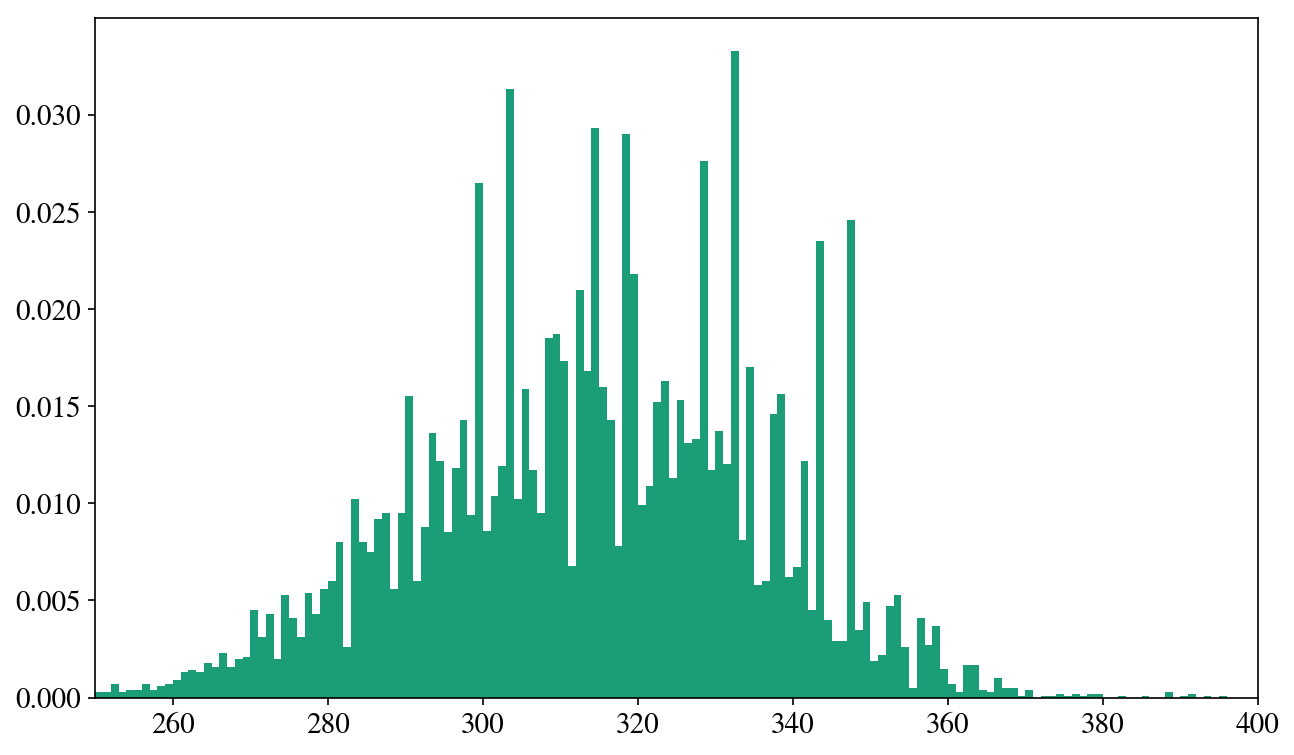

In [94]:
model = aggregated_poll_model(avg)
sims = simulate_election(model, 10000)
plot_simulation(sims)
plt.xlim(250, 400)

State
Alabama       0.000000
Alaska        0.000000
Arizona       0.113859
Arkansas      0.000000
California    0.999681
Name: Obama, dtype: float64


/home/ais/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


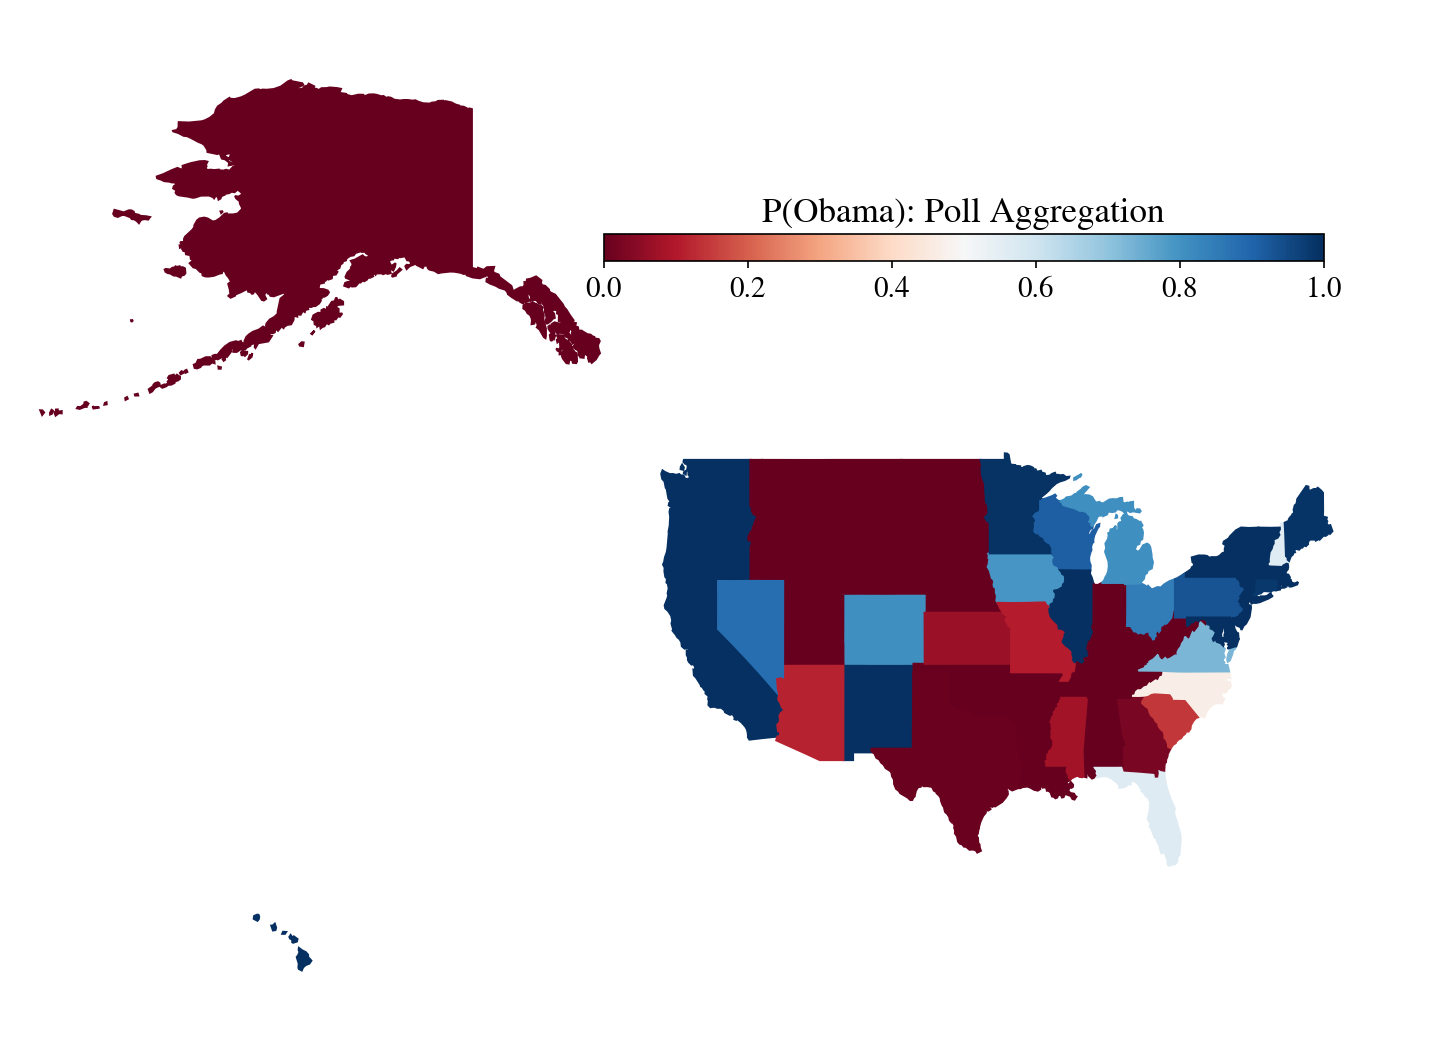

In [95]:
#your code here
make_map(model.Obama, "P(Obama): Poll Aggregation")